# **Computational and Numerical Methods Lab - 5**


```
Abhimanyu Karia: 202201435
Devarshi Patel : 202201447
```

# Jacobi Method

- The Jacobi method is an iterative algorithm for determining the solutions of a strictly diagonally dominant system of linear equations. Each diagonal element is solved for, and an approximate value is plugged in. The process is then iterated until it converges.

- Equation to be followed:
    - 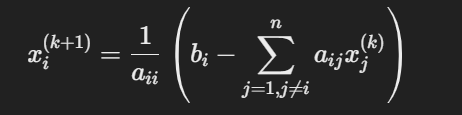
    


# Gauss-Siedel Method

- Improvisation of Jacobi method
- In Jacobi method the value of the variables is not modified until next iteration, whereas in Gauss-Seidel method the value of the variables are modified as soon as new value is evaluated
- Equation used: 
    - 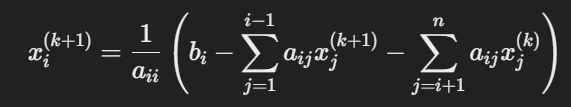

# Comparision between both methods

- Gauss-Siedel method converges more rapidly than Jacobi method as it uses modified values for evaluation whenever available. 

For both Jacobi and Seidal Method our algorithm runs as follows:
1. Create a object of class LinearSolve and pass required matrix A and vector b.
2. Call the get_roots function specifying method and initial guess.
3. When a call enters jacobi or seidal function, first thing function does is check if the matrix is diagonally dominant.
    - If the matrix is dominant, no change in the matrix.
    - If the matrix isn't diagonally dominant but row exchanges can make it diagonally dominant return new matrix alongside permutation performed to make it dominant (same permutation is done in the vector b as done in the matrix A).
    - If the matrix isn't diagonally dominant and can't be made dominant through row exhanges return NULL and function ends here.
4. Now perform Jacobi/Seidal method to get required answer.
5. Store iteration number and calculate distance between two iteration results (i.e new answer and previous iteration answer) (Note : Here we have used euclidean norm to calculate distance).
6. Stopping Condition : Norm < Maximum_specified_error.
7. Return Answer, iteration list and norms in consecutive iterations.
8. Compare results of Gauss-Seidal, Jacobi and Inbuilt numpy function.
9. Plot Iteration vs Norm graph for Seidal and Jacobi to compare the results.

# Q1)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [23]:
class LinearSolve:
    def __init__(self,matrix,vector) -> None:
        self.matrix = matrix
        self.vector = vector
        self.res = np.array([])
        self.err = 1e-7
    def get_upper_permute(self,matrix):
        n = len(matrix)
        upper = copy.deepcopy(matrix)
        permute = np.eye(n)
        for i in range(n):
            if(upper[i][i] == 0):
                j = i+1
                while(j < n and upper[j][i] == 0):
                    j += 1
                if(j == n):
                    continue
                else:
                    permute[[i,j]] = permute[[j,i]]
                    upper = np.dot(permute,upper)
            for j in range(i+1,n):
                m = upper[j][i]/upper[i][i]
                upper[j][i] = 0
                for k in range(i+1,n+1):
                    upper[j][k] = upper[j][k] - m*upper[i][k]
        return upper,permute
    
    def get_inv(self,matrix):
        matinv = np.linalg.inv(matrix)
        return matinv

    def get_lower(self,matrix,upper,permute):
        pa = np.dot(permute,matrix)
        upp_inv = self.get_inv(upper)
        return np.dot(pa,upp_inv)

    def gauss(self,A_n,b):
        n = len(A_n)
        A = copy.deepcopy(A_n)
        #st = deque()
        for i in range(n):
            A[i].append(b[i])
        
        A,_ = self.get_upper_permute(A)
        x = [0]*n
        for i in range(n-1,-1,-1):
            x[i] = A[i][n]
            k = 0
            for j in range(n-1,i,-1):
                x_j = x[j]*A[i][j]
                if(abs(x_j) < self.err):
                    continue
                x[i] -= x[j]*A[i][j]
            x[i] /= A[i][i]
            if(abs(x[i]) < self.err):
                x[i] = 0
        self.res = x
        return np.array(x)
    
    def vector_norm(self,x1,x2):
        return np.linalg.norm(np.array(x1) - np.array(x2))
    
    def jacobi(self,A,b,guess):
        C,permute = self.diagonal_dominance(A)
        if C == False:
            return None,None,None
        n = len(A)
        new_b = copy.deepcopy(b)
        for i in range(n):
            new_b[permute[i]] = b[i]
        iter = []
        ite = 1
        norm = []
        x = copy.deepcopy(guess)
        mat = [0]*n
        norm_val = 0
        new_x = copy.deepcopy(x)
        while True:
            for i in range(n):
                sum_val = 0
                for j in range(n):
                    if i != j :
                        sum_val -= C[i][j]*x[j]
                new_x[i] = (new_b[i] + sum_val)/C[i][i]
            
            norm_val = self.vector_norm(new_x,x)
            # print(new_x)
            # print(x)
            if(norm_val < self.err):
                break
            iter.append(ite)
            ite += 1
            norm.append(norm_val)
            x = copy.deepcopy(new_x)
        return np.array(x),iter,norm
    
    def diagonal_dominance(self,A):
        flag = True
        n = len(A)
        column_idx = [0]*n
        uset = set()
        for i in range(n):
            column_idx[i] = A[i].index(max(A[i],key=abs))
            #print(column_idx[i])
            if column_idx[i] in uset:
                print('Matrix is not Diagonally Dominant and hence result cannot be computed')
                return False,column_idx
            val = 0
            for j in range(n):
                if j != column_idx[i]:
                    val += abs(A[i][j])
            if val >= abs(A[i][column_idx[i]]):
                print('Matrix is not Diagonally Dominant and hence result cannot be computed')
                return False,column_idx
            uset.add(column_idx[i])
        C = copy.deepcopy(A)
        for i in range(n):
            if i != column_idx[i]:
                flag = False
            C[column_idx[i]] = A[i]
        if not flag:
            print('Matrix is not Diagonally Dominant but permutation of rows can make it dominant')
        else:
            print('Matrix is Diagonally Dominant')
        return C,column_idx

    def seidal(self,A,b,guess):
        C,permute = self.diagonal_dominance(A)
        if C == False:
            return None,None,None
        n = len(A)
        new_b = copy.deepcopy(b)
        for i in range(n):
            new_b[permute[i]] = b[i]
        x = copy.deepcopy(guess)
        iter = []
        norm = []
        ite = 1
        mat = [0]*n
        norm_val = 0
        old_x = copy.deepcopy(x)
        while True:
            for i in range(n):
                sum_val = 0
                for j in range(n):
                    if i != j :
                        sum_val -= C[i][j]*x[j]
                x[i] = (new_b[i] + sum_val)/C[i][i]
            #print(x)
            norm_val = self.vector_norm(x,old_x)
            if(norm_val < self.err):
                break
            iter.append(ite)
            ite += 1
            norm.append(norm_val)
            old_x = copy.deepcopy(x)
        return np.array(x),iter,norm
    
    def inbuilt(self,A_n,b):
        return np.linalg.solve(A_n,b)
    
    def get_roots(self,method = 'None',guess = np.array([])):
        match method:
            case 'gauss':
                return self.gauss(self.matrix,self.vector)
            case 'numpy':
                return self.inbuilt(self.matrix,self.vector)
            case 'seidal':
                return self.seidal(self.matrix,self.vector,guess)
            case 'jacobi':
                return self.jacobi(self.matrix,self.vector,guess)
            case 'None':
                return self.inbuilt(self.matrix,self.vector)


# Examples 

Matrix is Diagonally Dominant
Roots are (jacobi method):  [ 1.00000002  2.00000004 -0.99999996]
Matrix is Diagonally Dominant
Roots are (seidal method):  [ 1.  2. -1.]
Roots using numpy:  [ 1.  2. -1.]


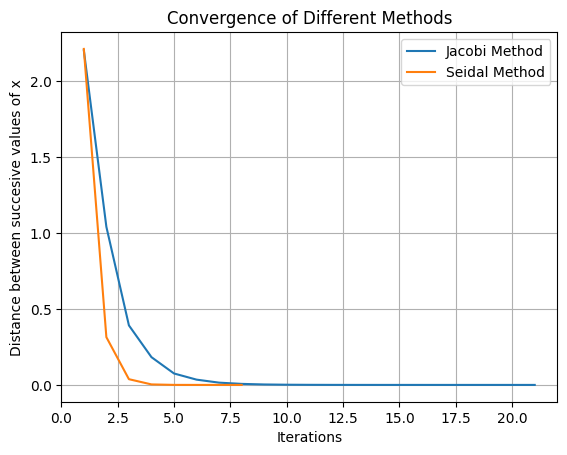

In [24]:
A = [[9,1,1],[2,10,3],[3,4,11]]
b = [10,19,0]
guess = [0,0,0]
ls = LinearSolve(A,b)
val_j,j_iter,j_norm = ls.get_roots(method = 'jacobi',guess = guess)
print('Roots are (jacobi method): ',val_j)
val_s,s_iter,s_norm = ls.get_roots(method = 'seidal',guess = guess)
print('Roots are (seidal method): ',val_s)
val_x = ls.get_roots(method='numpy')
print('Roots using numpy: ',val_x)
if val_j is not None:
    plt.plot(j_iter,j_norm,label = 'Jacobi Method')
    plt.plot(s_iter,s_norm,label = 'Seidal Method')
    plt.legend()
    plt.grid(True)
    plt.xlabel('Iterations')
    plt.ylabel('Distance between succesive values of x')
    plt.title('Convergence of Different Methods')
    plt.show()

Result:
1. Matrix is diagonally dominant.
2. Roots generated using both methods are approximately same.
3. Gauss siedal method converges faster than Jacobi method

Matrix is not Diagonally Dominant but permutation of rows can make it dominant
Roots are (jacobi method):  [ 1.00000002  2.00000004 -0.99999996]
Matrix is not Diagonally Dominant but permutation of rows can make it dominant
Roots are (seidal method):  [ 1.  2. -1.]
Roots using numpy:  [ 1.  2. -1.]


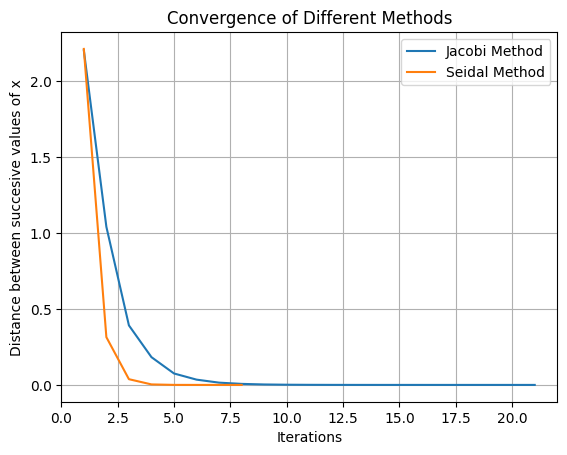

In [25]:
A = [[2,10,3],[9,1,1],[3,4,11]]
b = [19,10,0]
guess = [0,0,0]
ls = LinearSolve(A,b)
val_j,j_iter,j_norm = ls.get_roots(method = 'jacobi',guess = guess)
print('Roots are (jacobi method): ',val_j)
val_s,s_iter,s_norm = ls.get_roots(method = 'seidal',guess = guess)
print('Roots are (seidal method): ',val_s)
val_x = ls.get_roots(method='numpy')
print('Roots using numpy: ',val_x)
if val_j is not None:
    plt.plot(j_iter,j_norm,label = 'Jacobi Method')
    plt.plot(s_iter,s_norm,label = 'Seidal Method')
    plt.legend()
    plt.grid(True)
    plt.xlabel('Iterations')
    plt.ylabel('Distance between succesive values of x')
    plt.title('Convergence of Different Methods')
    plt.show()

Result:
1. Matrix is not diagonally dominant but can be made diagonally dominant.
2. Roots generated using both methods are approximately same.
3. Gauss siedal method converges faster than Jacobi method

In [26]:
A = [[2,10,3],[9,9,1],[3,4,11]]
b = [10,19,0]
guess = [0,0,0]
ls = LinearSolve(A,b)
val_j,j_iter,j_norm = ls.get_roots(method = 'jacobi',guess = guess)
print('Roots are (jacobi method): ',val_j)
val_s,s_iter,s_norm = ls.get_roots(method = 'seidal',guess = guess)
print('Roots are (seidal method): ',val_s)
val_x = ls.get_roots(method='numpy')
print('Roots using numpy: ',val_x)
if val_j is not None:
    plt.plot(j_iter,j_norm,label = 'Jacobi Method')
    plt.plot(s_iter,s_norm,label = 'Seidal Method')
    plt.legend()
    plt.grid(True)
    plt.xlabel('Iterations')
    plt.ylabel('Distance between succesive values of x')
    plt.title('Convergence of Different Methods')
    plt.show()

Matrix is not Diagonally Dominant and hence result cannot be computed
Roots are (jacobi method):  None
Matrix is not Diagonally Dominant and hence result cannot be computed
Roots are (seidal method):  None
Roots using numpy:  [ 1.22745626  0.95962315 -0.68371467]


Result:
1. Roots not generated for both methods because matrix is not diagonally dominant and can't be made diagonally dominant by exchanging rows.